Nous avons voulu répondre à plusieurs questions à partir des datas du kaggle **Young People Survey** https://www.kaggle.com/miroslavsabo/young-people-survey?select=responses.csv. Il a été réalisé sur les réponses d'étudiants slovaquiens. Pour l'exemple, il établi une liste de réponse en numérique pour l'intérêt que nous portons à différents genres musicaux (1 = pas du tout intéressé, 5 = Très intérressé) 

# What are you listening when you feel... 

## ...Lonely ?

Pour commencer, nous allons créer des DataFrames contenant les réponses au questionnaire pré-cité. Pour rappel, le questionnaire établi une réponse en numérique où 1 = Ne se sent pas seul et 5 = Se sent très seul. 

###     -> Création des DataFrames

On crée un DataFrame pour chaque valeur de 'Loneliness' à l'aide de conditions

In [272]:
import pandas as pd 
df = pd.read_csv('../input/young-people-survey/responses.csv')
lonely5 = df[df['Loneliness'] == 5]
lonely4 = df[df['Loneliness'] == 4]
lonely3 = df[df['Loneliness'] == 3]
lonely2 = df[df['Loneliness'] == 2]
lonely1 = df[df['Loneliness'] == 1]
average = df


**On cherche à savoir dans un premier temps, si nous écoutons plus de musique lorsque nous nous sentons seul :**
* On fais la moyenne des valeurs de 'Music' pour Lonely5, Lonely1 et Average à l'aide de la fonction *.mean()* 
* Pour rappel la fonction *.iloc[:,0:1]* récupère toutes les lignes mais seulement la première colonne (= 'Music')

In [273]:
music_average = average.iloc[:,0:1].mean()
music_lonely5 = lonely5.iloc[:,0:1].mean()
music_lonely1 = lonely1.iloc[:,0:1].mean()
compa_music = pd.concat([music_average, music_lonely5, music_lonely1], axis=1)
compa_music.rename(columns = {0:'Average', 1:'Lonely', 2:'Not lonely'})

,Average,Lonely,Not lonely
Music,4.731877,4.836538,4.642857


> **Conclusion :** Nous écoutons plus de musique lorsque nous nous sentons seul 

### -> Création des visuels

Nous avons ensuite voulu chercher les différences entre les différents genres musicaux (colonnes 2 à 18). Nous avons donc sorti la moyenne de ces colonnes que nous avons concaténer dans un nouveau tableau. Nous avons pris soin de trier les variations faibles d'appréciation (considérant que < 0.1 était une variation négligeable de l'intérêt porté à un genre de musique dans ce cas de figure)

In [274]:
ln1_mean = lonely1.iloc[:,2:18].mean().sort_values(ascending=False)
average_mean = df.iloc[:,2:18].mean().sort_values(ascending=False)
ln5_mean = lonely5.iloc[:,2:18].mean().sort_values(ascending=False)

all_mean = pd.concat([ln1_mean, average_mean, ln5_mean ], axis=1)
tab = all_mean.rename(columns = {0:'Loneliness1', 1:'Average', 2:'Loneliness5'})
h_var = tab[abs(tab['Loneliness1']-tab['Loneliness5']) > 0.1]
h_var

,Loneliness1,Average,Loneliness5
Rock,3.442478,3.761952,4.038095
Dance,3.132743,3.113320,2.932692
"Hiphop, Rap",3.071429,2.910537,2.800000
Rock n roll,2.982143,3.141575,3.174757
"Reggae, Ska",2.873874,2.769691,2.666667
Latino,2.848214,2.842315,2.692308
Classical music,2.823009,2.956132,3.153846
Alternative,2.810811,2.828514,3.200000
Musical,2.398230,2.761905,2.730769
Folk,2.300885,2.288557,2.200000


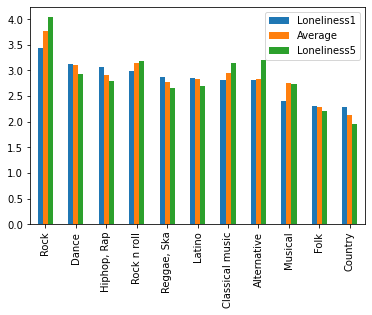

In [275]:
h_var.plot.bar()

> **Conclusion :** Certaines musiques comme le Rock, le classique ou l'alternative sont bien plus représenté pour les personnes se déclarant 'se sentir seul'. A l'inverse la Country, la Folk, la Latino ou le Reggae sont moins représenté chez cette catégorie de personne

In [276]:
low_var = tab[abs(tab['Loneliness1']-tab['Loneliness5']) <= 0.1]
low_var

,Loneliness1,Average,Loneliness5
Pop,3.451327,3.471698,3.457143
"Swing, Jazz",2.669643,2.759960,2.742857
Punk,2.522523,2.456088,2.504762
"Techno, Trance",2.433628,2.338983,2.394231
Metal or Hardrock,2.405405,2.361470,2.390476


> **Conclusion :** On conclu également que la Pop, le Jazz, la Techno, le Metal ou le Punk ne semblent pas lié au sentiment de solitude

## ...Happy ?

### -> Création des DataFrames

On défini les valeurs 'Happy' et 'Not happy' en écartant la valeur neutre du questionnaire

In [277]:
not_happy = df[df['Happiness in life']<= 2]
happy = df[df['Happiness in life']>= 4]

**On cherche à savoir, si nous écoutons plus de musique lorsque nous nous sentons heureux:**

In [278]:
music_not_happy = not_happy.iloc[:,0:1].mean().sort_values(ascending=False)
music_happy = happy.iloc[:,0:1].mean().sort_values(ascending=False)
average = df.iloc[:,0:1].mean().sort_values(ascending=False)

happy_music = pd.concat([music_not_happy, average , music_happy], axis=1)
tab = happy_music.rename(columns = {0:'Not Happy', 1:'Average', 2:'Happy'})
tab

,Not Happy,Average,Happy
Music,4.685714,4.731877,4.739599


> **Conclusion** : Notre niveau d'happiness ne semble pas affecter significativement notre appréciation de la musique

### -> Création des visuels

De la même façon que pour Lonely on crée des DataFrames qui regroupe les différents genres de musique et on fait la moyenne de leurs valeurs. On a ainsi le même tableau concaténé de moyennes d'apréciation des genres musicaux mais pour les valeurs min et max de 'Happiness in Life'

* Nous avons défini qu'une variation inférieur à 0.3 n'était pas significatif dans ce cas précis

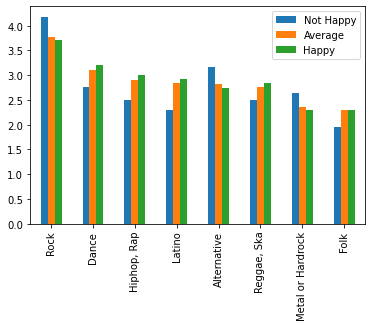

In [279]:
not_hp_mean = not_happy.iloc[:,2:18].mean().sort_values(ascending=False)
hp_mean = happy.iloc[:,2:18].mean().sort_values(ascending=False)
all_mean = df.iloc[:,2:18].mean().sort_values(ascending=False)

all_mean = pd.concat([not_hp_mean, all_mean, hp_mean ], axis=1)
tab = all_mean.rename(columns = {0:'Not Happy', 1:'Average', 2:'Happy'})

h_var = tab[abs(tab['Not Happy'] - tab['Happy'])>= 0.3]
h_var.sort_values('Average',ascending=False).plot.bar()

# Pourquoi sommes nous heureux ?

## Un premier coup d'oeil sur nos études 

* On sélectionne à l'aide de conditions les différents niveaux d'études des réponses apportés

In [280]:
secondary = df[df['Education'] == 'secondary school']
primary = df[df['Education'] == 'primary school']
college = df[df['Education'] == 'college/bachelor degree'] 
masters = df[df['Education'] == 'masters degree']
doctorate = df[df['Education'] == 'doctorate degree'] 


* On fais ensuite la moyenne du niveau d'happiness et on concatène les tableaux

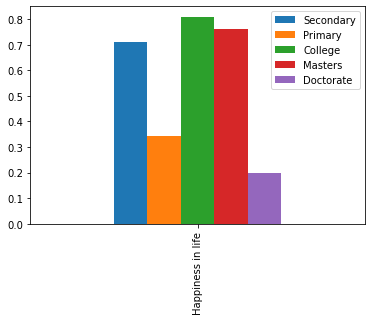

In [281]:
a = secondary[['Happiness in life','Education']].mean()-3
b = primary[['Happiness in life','Education']].mean()-3
c = college[['Happiness in life','Education']].mean()-3          
d = masters[['Happiness in life','Education']].mean()-3
e = doctorate[['Happiness in life','Education']].mean()-3
all_mean = pd.concat([a, b, c ,d, e], axis=1)
tab = all_mean.rename(columns = {0:'Secondary', 1:'Primary', 2:'College',3:'Masters', 4:'Doctorate'})
tab.plot.bar()

> **Conclusion :** Il vautdrait mieux qu'on arrête nos études maintenant :)

## Puis sur nos centres d'intérêts

Nous avons défini 3 DataFrames contenant chacun les valeurs pour les gens heureux (happiness >= 4), malheureux(happiness <= 2) et neutre (happiness == 3)

In [282]:
happy = df[df['Happiness in life'] >= 4]
neutral = df[df['Happiness in life'] == 3]
not_happy = df[df['Happiness in life'] <= 2]

Nous avons selectionné différentes activités afin de savoir pour lesquels les gens sont-ils le plus heureux :
* Nous avons ensuite concaténé dans un tableau
* Nous avons ensuite retravaillé les valeurs qui nous semblaient peu pertinente (variation < 0.1)

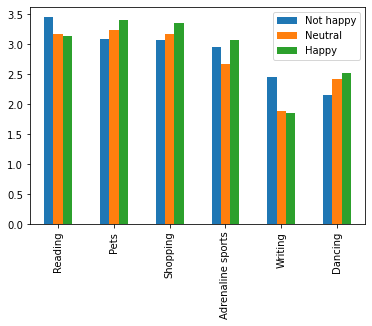

In [283]:
hp1_mean = not_happy[['Shopping','Dancing','Music','Adrenaline sports','Theatre','Pets','Art exhibitions','Reading','Writing']].mean().sort_values(ascending=False)
hp3_mean = neutral[['Shopping','Dancing','Music','Adrenaline sports','Theatre','Pets','Art exhibitions','Reading','Writing']].mean().sort_values(ascending=False)
hp5_mean = happy[['Shopping','Dancing','Music','Adrenaline sports','Theatre','Pets','Art exhibitions','Reading','Writing']].mean().sort_values(ascending=False)
hp_all_mean = pd.concat([hp1_mean, hp3_mean, hp5_mean], axis=1)
tab = hp_all_mean.rename(columns = {0:'Not happy', 1:'Neutral', 2:'Happy'})
tab = tab[abs(tab['Not happy']-tab['Happy']) > 0.1]
tab.plot.bar()

> **Conclusion:** On peut conclure que les gens heureux se consacrent aux activités telle que la dance, le chant, les sports à risque...

 # EN COURS NON FINIS.....

In [284]:
phobia_darkness = df[df['Darkness']>= 4]
phobia_spider = df[df['Spiders']>= 4]
phobia_snake = df[df['Snakes']>= 4]
phobia_height = df[df['Height']>= 4]
phobia_public = df[df['Fear of public speaking']>= 4]


pda_mean = phobia_darkness.iloc[:,20:31].mean().sort_values(ascending=False)
psp_mean = phobia_spider.iloc[:,20:31].mean().sort_values(ascending=False)
psn_mean = phobia_snake.iloc[:,20:31].mean().sort_values(ascending=False)
ph_mean = phobia_height.iloc[:,20:31].mean().sort_values(ascending=False)
pp_mean = phobia_public.iloc[:,20:31].mean().sort_values(ascending=False)
phall_mean = df.iloc[:,20:31].mean().sort_values(ascending=False)



allhp_mean = pd.concat([pda_mean, psp_mean, psn_mean, ph_mean, pp_mean,phall_mean ], axis=1)
tab = allhp_mean.rename(columns = {0:'Darkness', 1:'Spider', 2:'Snake', 3:'Height', 4:'Public speaking', 5:'Average'})

maximum = tab.max(axis=1)
minimum = tab.min(axis=1)
tab_strip = pd.concat([maximum, minimum], axis=1).rename(columns = {0:'Maximum', 1:'Minimum'})
tab_strip = tab_strip[abs(tab_strip['Maximum'] - tab_strip['Minimum']) >= 0.2]
tab_new = pd.concat([tab_strip, tab], axis=1).dropna().iloc[:,2:]




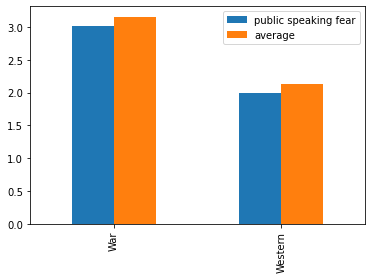

In [285]:
all_pp = pd.concat([pp_mean,phall_mean],axis = 1)
tab_public = all_pp.rename(columns = {0:'public speaking fear', 1:'average'})
h_var = tab_public[abs(tab_public['public speaking fear'] - tab_public['average'])>= 0.1]
h_var.plot.bar()

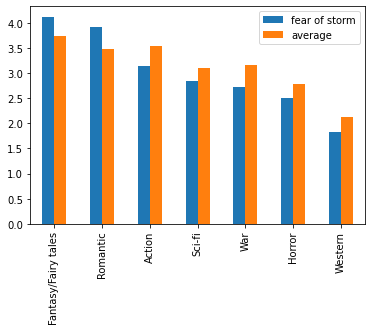

In [286]:
all_pst = pd.concat([pst_mean,phall_mean],axis = 1)
tab_storm = all_pst.rename(columns = {0:'fear of storm', 1:'average'})
h_var_storm = tab_storm[abs(tab_storm['fear of storm'] - tab_storm['average'])>= 0.2]
h_var_storm.plot.bar()